<a href="https://colab.research.google.com/github/fernandanlisboa/clustering_countries/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componentes

*    Davi Costa
*    Fernanda Lisboa
*    João Felipe
*    Maria Amado

#Importação

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

#Drive


In [ ]:
drive_path = '/content/drive'
directory = f'{drive_path}/MyDrive/Desafio 02 - Agrupamento'
csv_file = 'Country-data.csv'

In [ ]:
drive.mount(drive_path)

Mounted at /content/drive


#Configurando df


In [ ]:
data = pd.read_csv(f"{directory}/{csv_file}")

In [ ]:
data.head(12)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [ ]:
data.shape

(167, 10)

In [ ]:
data.describe(include='object')

,country
count,167
unique,167
top,Afghanistan
freq,1


# Valores diferenciados

In [ ]:
data.loc[data['inflation'] < 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


In [ ]:
index_deflacao = data.loc[data['inflation'] < 0].index
df = data.drop(index_deflacao)

df.loc[df['inflation'] < 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
df = df.reset_index(drop=True)

# Padronizando os dados


Os valores de cada atributo numérico possui intervalos muito distintos entre si.

In [ ]:
country_col = df['country']
df = df.drop(columns='country')

In [ ]:
cols_tonorm = df.columns.tolist()

## MinMax Scaler

O MinMaxScaler redimensiona o conjunto de dados de modo que todos os valores de características estejam no intervalo [0, 1], como mostrado no painel à direita abaixo. No entanto, essa escala comprime todos os valores internos na estreita faixa [0, 0.005] para a ocupação média transformada das casas.

Tanto o StandardScaler quanto o MinMaxScaler são muito sensíveis à presença de valores atípicos (outliers).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
transformed_data = scaler.fit_transform(df[cols_tonorm])
df_min_max = pd.DataFrame(transformed_data, columns=cols_tonorm)

df_min_max

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.056555,0.358608,0.291255,0.008047,0.089368,0.481038,0.733227,0.003073
1,0.068160,0.159476,0.294593,0.315291,0.074933,0.041699,0.882236,0.067093,0.036833
2,0.120253,0.218942,0.146675,0.203555,0.098809,0.153505,0.886228,0.265176,0.040365
3,0.566699,0.355599,0.064636,0.278263,0.042535,0.214176,0.558882,0.787540,0.031488
4,0.037488,0.259539,0.262275,0.382203,0.148652,0.012327,0.892216,0.143770,0.114242
...,...,...,...,...,...,...,...,...,...
154,0.129503,0.265828,0.213797,0.341926,0.018820,0.023690,0.616766,0.362620,0.026143
155,0.070594,0.162335,0.192666,0.113907,0.127750,0.440485,0.864271,0.198083,0.126650
156,0.100779,0.411062,0.312617,0.520574,0.031200,0.114985,0.818363,0.115016,0.010299
157,0.261441,0.170912,0.209447,0.223044,0.031120,0.225732,0.706587,0.549521,0.010299


In [ ]:
df_min_max.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.181419,0.223574,0.309787,0.294723,0.126105,0.077958,0.760203,0.285008,0.113768
std,0.198023,0.136674,0.172047,0.140397,0.152816,0.102189,0.177958,0.242793,0.172939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033593,0.134604,0.193288,0.194136,0.021633,0.018346,0.642715,0.101438,0.010299
50%,0.088121,0.198358,0.273462,0.278912,0.074370,0.051136,0.798403,0.206070,0.040747
75%,0.291139,0.288414,0.417340,0.373108,0.164731,0.105836,0.889222,0.468051,0.119491
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


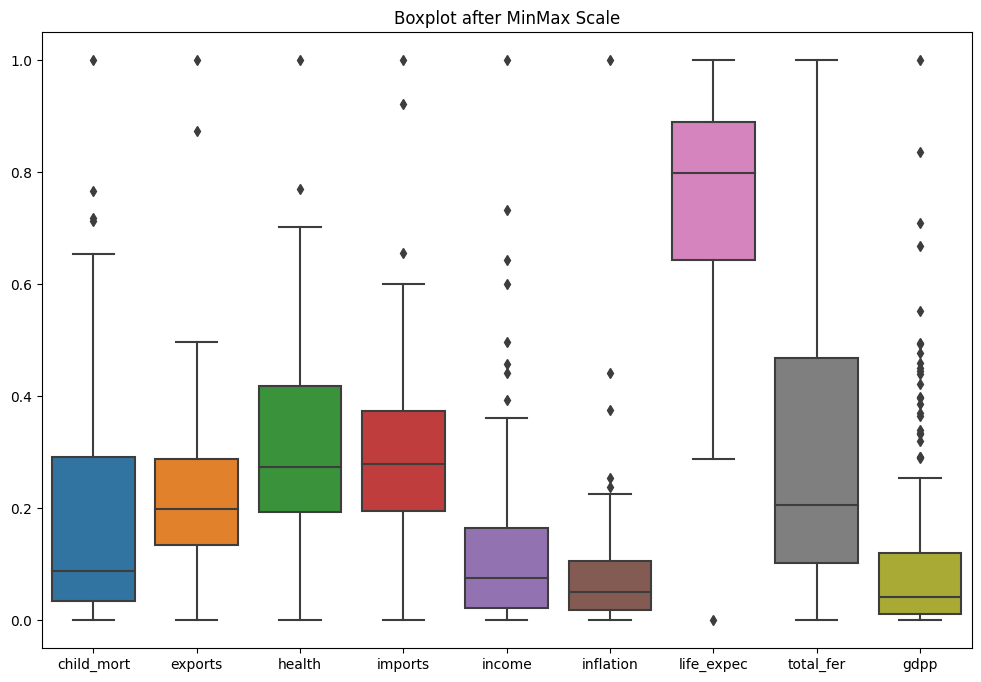

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_min_max)
plt.title('Boxplot after MinMax Scale')
plt.show()

In [ ]:
# gerando CSV
df_min_max['country'] = country_col
df_min_max.to_csv(f"{directory}/min_max_data.csv", index=False)

## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

transformed_data = scaler.fit_transform(df[cols_tonorm])
standard_df = pd.DataFrame(transformed_data, columns=cols_tonorm)
standard_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.241470,-1.225885,0.284664,-0.024775,-0.774992,0.112014,-1.573670,1.851926,-0.642105
1,-0.573758,-0.470463,-0.088590,0.146968,-0.335920,-0.355941,0.687906,-0.900371,-0.446274
2,-0.309859,-0.033996,-0.951061,-0.651406,-0.179184,0.741628,0.710409,-0.081943,-0.425789
3,1.951777,0.969036,-1.429407,-0.117609,-0.548595,1.337208,-1.134857,2.076334,-0.477279
4,-0.729138,0.263976,-0.277029,0.625065,0.148009,-0.644278,0.744164,-0.583560,0.002746
...,...,...,...,...,...,...,...,...,...
154,-0.262999,0.310140,-0.559688,0.337279,-0.704276,-0.532725,-0.808560,0.320672,-0.508284
155,-0.561426,-0.449479,-0.682898,-1.291963,0.010799,3.558816,0.586641,-0.359152,0.074722
156,-0.408513,1.376125,0.016501,1.613749,-0.623005,0.363482,0.327854,-0.702364,-0.600192
157,0.405380,-0.386527,-0.585055,-0.512155,-0.623533,1.450652,-0.302237,1.092899,-0.600192


In [ ]:
standard_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,7.820439e-17,1.955110e-16,6.675303e-16,3.016455e-16,4.748124e-17,1.117206e-16,1.061345e-16,3.211966e-17,6.423932e-17
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-9.190461e-01,-1.640989e+00,-1.806285e+00,-2.105845e+00,-8.278174e-01,-7.652844e-01,-4.285310e+00,-1.177581e+00,-6.599326e-01
25%,-7.488685e-01,-6.530229e-01,-6.792741e-01,-7.187111e-01,-6.858051e-01,-5.851924e-01,-6.622886e-01,-7.584663e-01,-6.001924e-01
50%,-4.726381e-01,-1.850808e-01,-2.118002e-01,-1.129676e-01,-3.396139e-01,-2.632955e-01,2.153376e-01,-3.261511e-01,-4.235741e-01
75%,5.558267e-01,4.759136e-01,6.271160e-01,5.600807e-01,2.535553e-01,2.736719e-01,7.272862e-01,7.562870e-01,3.319746e-02
max,4.146821e+00,5.698819e+00,4.024455e+00,5.039333e+00,5.736676e+00,9.051388e+00,1.351751e+00,2.954164e+00,5.140734e+00


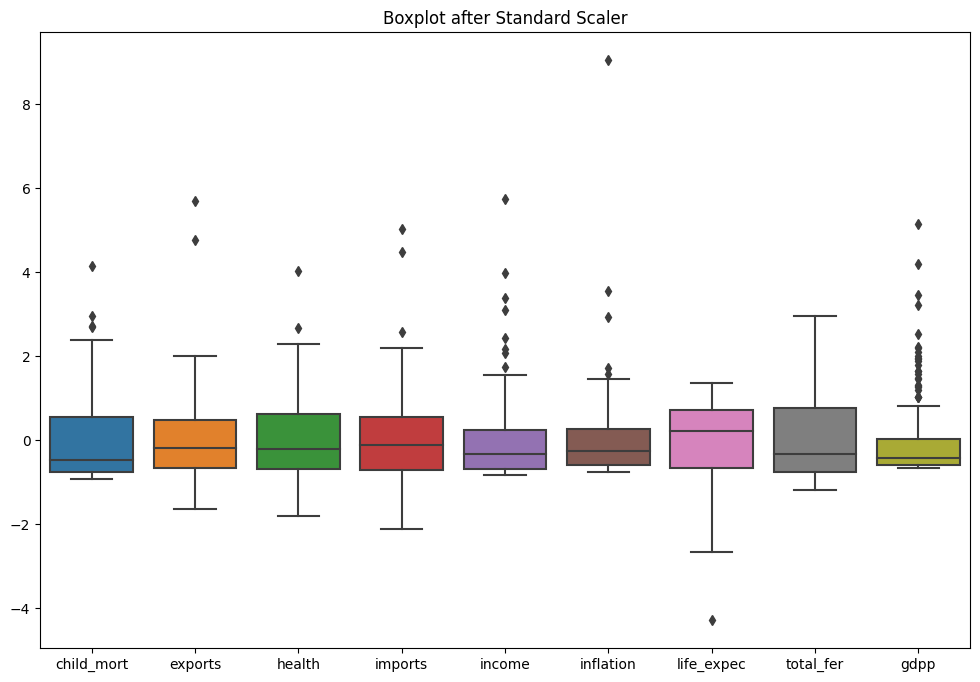

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(standard_df)
plt.title('Boxplot after Standard Scaler')
plt.show()

O Standard Scaler conseguiu padronizar a concentração dos dados para todos os atributos, com aproximadamente o mesmo intervalo ]-2; 3[. Entretanto, alguns outliers foram realocados, como expectativa de vida, que passaram a ficar como valores negativos.

In [ ]:
# gerando CSV
standard_df['country'] = country_col
standard_df.to_csv(f"{directory}/standard_data.csv", index=False)

In [ ]:
standard_df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
country       0
dtype: int64

## LogTransform + StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [ ]:
x_log = np.log(df[cols_tonorm])
x_log.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.502029,2.302585,2.025513,3.804438,7.383989,2.244956,4.028917,1.761300,6.315358
1,2.809403,3.332205,1.879465,3.883624,9.203316,1.501853,4.334673,0.500775,8.316300
2,3.306887,3.648057,1.427916,3.446808,9.464983,2.778819,4.337291,1.061257,8.402904
3,4.779123,4.131961,1.047319,3.758872,8.682708,3.109061,4.096010,1.818077,8.169053
4,2.332144,3.817712,1.796747,4.075841,9.857444,0.364643,4.341205,0.756122,9.409191


In [ ]:
x_log.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.117207,3.472306,1.830866,3.683254,9.053954,1.535960,4.242114,0.986680,8.417482
std,1.136864,0.757684,0.425649,0.678597,1.224097,1.170904,0.139638,0.477243,1.485221
min,0.955511,-2.216407,0.593327,-2.719617,6.411818,-1.832581,3.468856,0.207014,5.442418
25%,2.249905,3.163343,1.593306,3.399528,8.101659,0.725057,4.163549,0.623257,7.177782
50%,3.030134,3.549617,1.826161,3.761200,9.196241,1.699279,4.278054,0.924259,8.411833
75%,4.133560,3.922962,2.142999,4.051785,9.957028,2.411429,4.339249,1.425330,9.453217
max,5.337538,5.164786,2.884801,5.036953,11.736069,4.644391,4.409155,2.013569,11.561716


In [ ]:
scaler_std = StandardScaler()
log_standard_data = scaler_std.fit_transform(x_log)
standard_log_df = pd.DataFrame(log_standard_data, columns=cols_tonorm)
standard_log_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.221957,-1.548688,0.458740,0.179145,-1.368552,0.607425,-1.531613,1.628243,-1.419833
1,-0.271604,-0.185492,0.114537,0.296204,0.122404,-0.029221,0.664946,-1.021367,-0.068341
2,0.167372,0.232691,-0.949663,-0.349534,0.336842,1.064807,0.683752,0.156758,-0.009846
3,1.466462,0.873371,-1.846645,0.111785,-0.304240,1.347738,-1.049615,1.747586,-0.167796
4,-0.692733,0.457311,-0.080411,0.580356,0.658468,-1.003513,0.711869,-0.484631,0.669828
...,...,...,...,...,...,...,...,...,...
154,0.226741,0.488939,-0.406869,0.415933,-0.872281,-0.490728,-0.711069,0.559303,-0.284466
155,-0.245418,-0.162058,-0.564665,-1.205326,0.538551,1.962366,0.579702,-0.173335,0.738218
156,0.027572,1.064957,0.216639,1.036677,-0.528048,0.820110,0.357149,-0.670221,-0.837328
157,0.806054,-0.094147,-0.438504,-0.214642,-0.529875,1.392447,-0.215423,1.165508,-0.837328


In [ ]:
standard_log_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,1.284786e-16,7.150116e-16,7.820439e-17,8.015950e-16,9.985025e-16,-1.368577e-16,-1.287579e-15,-2.150621e-16,-1.368577e-16
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-1.907463e+00,-7.531746e+00,-2.916603e+00,-9.465265e+00,-2.165256e+00,-2.885962e+00,-5.555102e+00,-1.638850e+00,-2.009441e+00
25%,-7.653005e-01,-4.090613e-01,-5.598748e-01,-4.194272e-01,-7.804144e-01,-6.947324e-01,-5.644144e-01,-7.639108e-01,-8.373276e-01
50%,-7.683267e-02,1.023585e-01,-1.108896e-02,1.152272e-01,1.166062e-01,1.399217e-01,2.581941e-01,-1.312091e-01,-3.815710e-03
75%,8.968221e-01,5.966601e-01,7.356270e-01,5.447943e-01,7.400784e-01,7.500494e-01,6.978228e-01,9.220371e-01,6.995645e-01
max,1.959203e+00,2.240810e+00,2.483889e+00,2.001152e+00,2.198020e+00,2.663116e+00,1.200028e+00,2.158508e+00,2.123703e+00


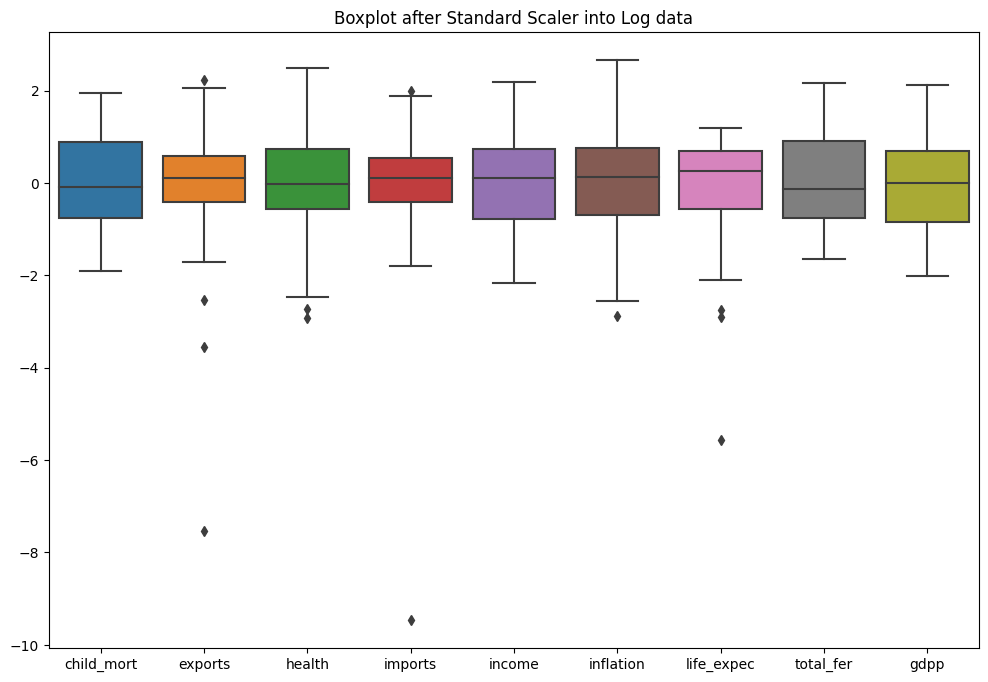

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(standard_log_df)
plt.title('Boxplot after Standard Scaler into Log data')
plt.show()

Apesar de reduzir os outliers, a padronização padrão com o uso de log, realocou alguns outliers como negaivos, incluindo receita de importação e exportação.

In [ ]:
standard_log_df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
standard_log_df['country'] = country_col
# gerando CSV
standard_log_df.to_csv(f"{directory}/standard_log_data.csv", index=False)

## Log as FunctionTransformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def log_transform(x):
    return np.log(x + 1)

In [ ]:
func_trans = FunctionTransformer(log_transform)
data_log = func_trans.fit_transform(df[cols_tonorm])
log_trans_df = pd.DataFrame(data_log, columns=cols_tonorm)

log_trans_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.513055,2.397895,2.149434,3.826465,7.384610,2.345645,4.046554,1.919859,6.317165
1,2.867899,3.367296,2.021548,3.903991,9.203416,1.702928,4.347694,0.974560,8.316545
2,3.342862,3.673766,1.642873,3.478158,9.465060,2.839078,4.350278,1.358409,8.403128
3,4.787492,4.147885,1.348073,3.781914,8.682877,3.152736,4.112512,1.968510,8.169336
4,2.424803,3.839452,1.950187,4.092677,9.857496,0.891998,4.354141,1.141033,9.409273
...,...,...,...,...,...,...,...,...,...
154,3.407842,3.862833,1.832581,3.983413,7.989899,1.286474,4.158883,1.504077,7.996654
155,2.895912,3.384390,1.776646,2.923162,9.711176,3.848018,4.335983,1.244155,9.510519
156,3.190476,4.290459,2.059239,4.396915,8.409831,2.572612,4.305416,1.081805,7.178545
157,4.048301,3.433987,1.821318,3.566712,8.407602,3.202746,4.226834,1.735189,7.178545


In [ ]:
log_trans_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.191147,3.522889,1.990774,3.726865,9.054192,1.839043,4.256536,1.325256,8.418040
std,1.068806,0.639324,0.359698,0.523985,1.223837,0.871912,0.137385,0.352621,1.484605
min,1.280934,0.103459,1.033184,0.063820,6.413459,0.148420,3.499533,0.802002,5.446737
25%,2.350240,3.204758,1.778335,3.432372,8.101962,1.120014,4.178981,1.052567,7.178545
50%,3.077312,3.577948,1.975469,3.784190,9.196343,1.867176,4.291828,1.258461,8.412055
75%,4.149459,3.942552,2.253916,4.069027,9.957076,2.497321,4.352211,1.640816,9.453296
max,5.342334,5.170484,2.939162,5.043425,11.736077,4.653960,4.421247,2.138889,11.561725


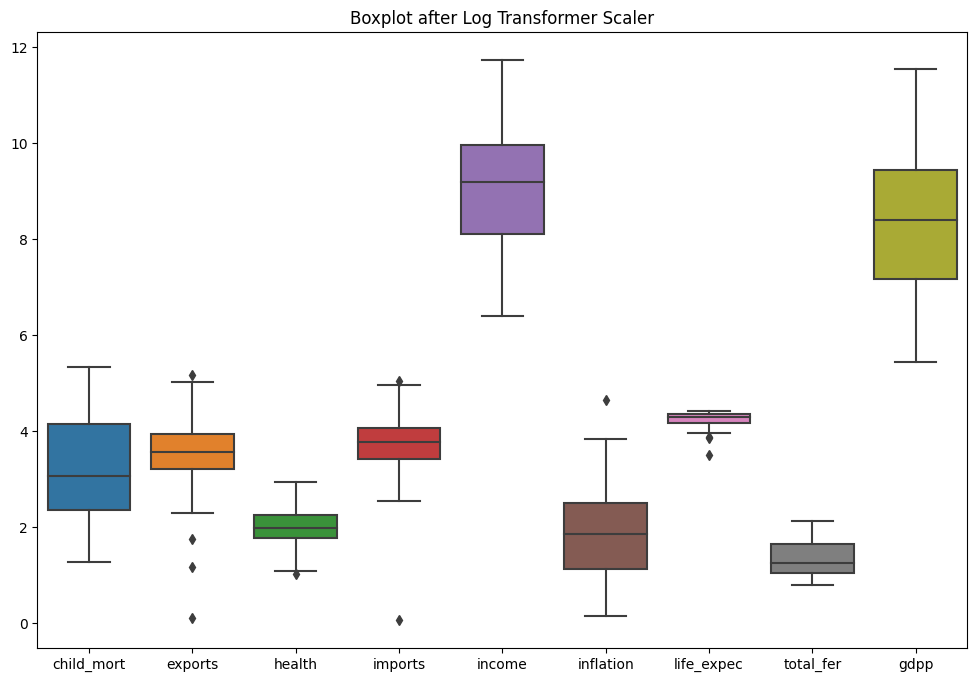

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(log_trans_df)
plt.title('Boxplot after Log Transformer Scaler')
plt.show()

## Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust_scl = RobustScaler()
robust_data = robust_scl.fit_transform(df[cols_tonorm])
robust_df = pd.DataFrame(robust_data, columns=cols_tonorm)

robust_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.313800,-0.921933,0.380028,0.068966,-0.463483,0.436984,-1.287449,1.437908,-0.345017
1,-0.077505,-0.252788,0.094313,0.203267,0.003933,-0.107870,0.340081,-0.379085,-0.035839
2,0.124764,0.133829,-0.565881,-0.421053,0.170787,1.170061,0.356275,0.161220,-0.003497
3,1.858223,1.022305,-0.932039,-0.003630,-0.222472,1.863511,-0.971660,1.586057,-0.084790
4,-0.196597,0.397770,-0.049931,0.577132,0.519101,-0.443588,0.380567,-0.169935,0.673077
...,...,...,...,...,...,...,...,...,...
154,0.160681,0.438662,-0.266297,0.352087,-0.388202,-0.313704,-0.736842,0.427015,-0.133741
155,-0.068053,-0.234201,-0.360610,-0.921960,0.373034,4.450193,0.267206,-0.021786,0.786713
156,0.049149,1.382900,0.174757,1.350272,-0.301685,0.729774,0.080972,-0.248366,-0.278846
157,0.672968,-0.178439,-0.285714,-0.312160,-0.302247,1.995597,-0.372470,0.936819,-0.278846


In [ ]:
robust_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.362259,0.163943,0.162126,0.088339,0.361537,0.306562,-0.154967,0.215316,0.668741
std,0.768884,0.888588,0.767887,0.784459,1.067918,1.168007,0.721918,0.662259,1.583795
min,-0.342155,-1.289628,-1.220527,-1.558407,-0.519719,-0.584480,-3.238866,-0.562092,-0.373164
25%,-0.211720,-0.414498,-0.357836,-0.473684,-0.368539,-0.374794,-0.631579,-0.285403,-0.278846
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.788280,0.585502,0.642164,0.526316,0.631461,0.625206,0.368421,0.714597,0.721154
max,3.540643,5.211896,3.242718,4.029038,6.468539,10.845349,0.817814,2.165577,8.784965


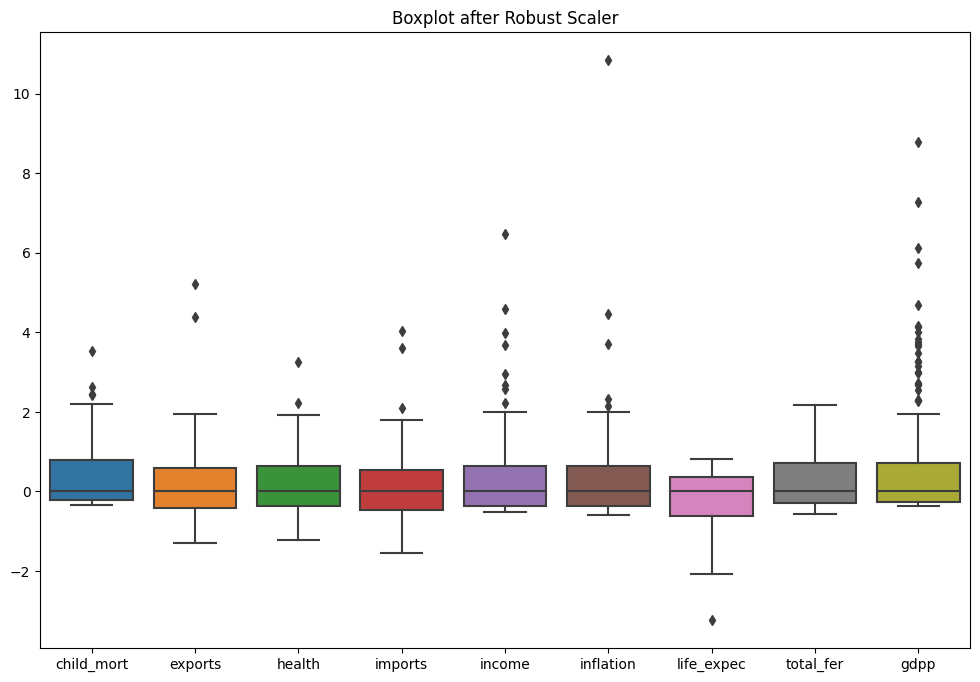

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(robust_df)
plt.title('Boxplot after Robust Scaler')
plt.show()

In [ ]:
robust_df['country'] = country_col
# gerando CSV
robust_df.to_csv(f"{directory}/standard_robust_data.csv", index=False)

In [ ]:
robust_df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
country       0
dtype: int64

## Normalizer Scaler

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm = Normalizer()

transformed_data = norm.fit_transform(df[cols_tonorm])
norm_df = pd.DataFrame(transformed_data, columns=cols_tonorm)
norm_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296
...,...,...,...,...,...,...,...,...,...
154,0.006974,0.011129,0.001254,0.012586,0.704517,0.000626,0.015046,0.000836,0.709293
155,0.000802,0.001337,0.000230,0.000826,0.773949,0.002153,0.003537,0.000116,0.633231
156,0.004980,0.015388,0.001462,0.017140,0.959588,0.002586,0.015623,0.000417,0.279969
157,0.012059,0.006426,0.001110,0.007368,0.959578,0.005055,0.014458,0.001000,0.280591


In [ ]:
norm_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.016843,0.005917,0.001443,0.009812,0.862056,0.001915,0.013256,0.000959,0.473268
std,0.031964,0.007348,0.002342,0.014858,0.098346,0.003614,0.015770,0.001632,0.145758
min,0.000020,0.000028,0.000013,0.000017,0.456921,0.000003,0.000554,0.000012,0.236038
25%,0.000359,0.001424,0.000264,0.001245,0.838196,0.000118,0.003066,0.000078,0.369902
50%,0.002301,0.003188,0.000563,0.004362,0.897614,0.000626,0.006984,0.000228,0.433136
75%,0.018177,0.007315,0.001604,0.012299,0.927943,0.002166,0.017427,0.001046,0.545312
max,0.163415,0.057900,0.015013,0.117818,0.971387,0.029302,0.081003,0.009213,0.889144


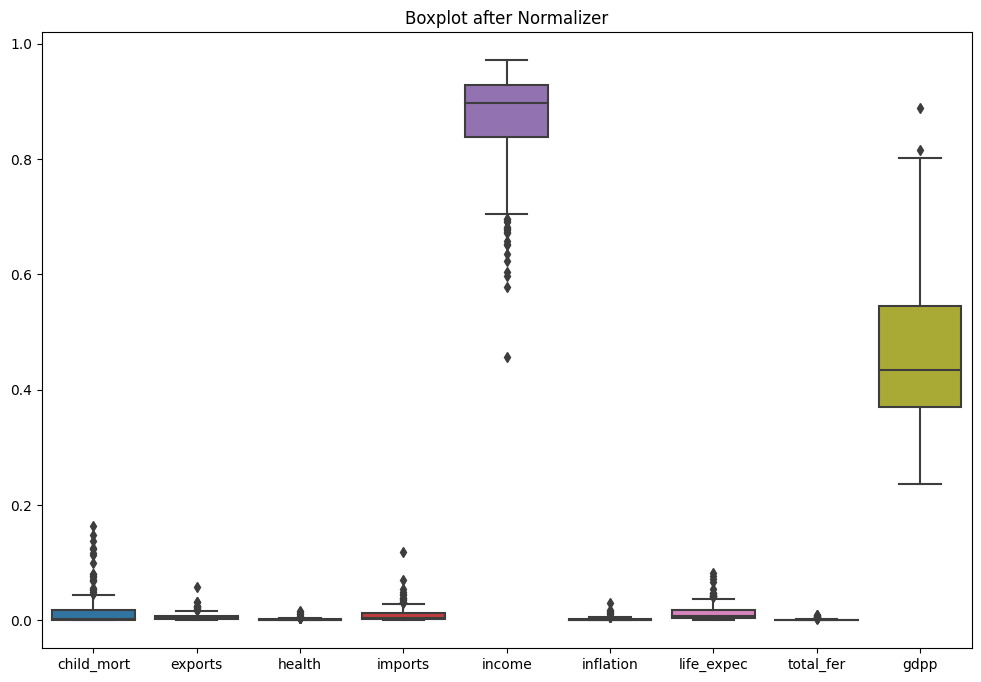

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(norm_df)
plt.title('Boxplot after Normalizer')
plt.show()

In [ ]:
# gerando CSV
norm_df.to_csv(f"{directory}/normalized_data.csv", index=False)

# Correlação de Pearson - Standard Log

<ipython-input-49-318b8eab0b9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=standard_log_df.corr(method="pearson")


<Axes: >

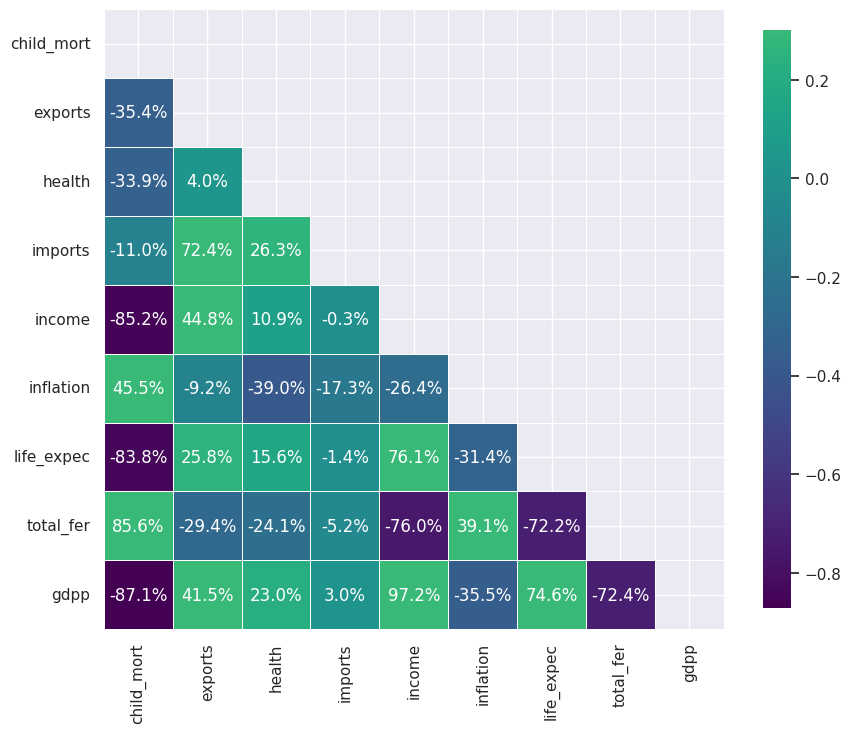

In [ ]:
corr=standard_log_df.corr(method="pearson")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize':(10,15)})
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3, center=0,
             fmt=".1%",square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

